In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math
from google.colab import files

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
file = files.upload()

Saving bakery_sales1.csv to bakery_sales1 (2).csv


In [ ]:
bakery = pd.read_csv('bakery_sales1.csv')
bakery

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,02/01/21,8:38,150040,BAGUETTE,1,€ 90.00
1,1,02/01/21,8:38,150040,PAIN AU CHOCOLAT,3,€ 120.00
2,4,02/01/21,9:14,150041,PAIN AU CHOCOLAT,2,€ 120.00
3,5,02/01/21,9:14,150041,PAIN,1,€ 115.00
4,8,02/01/21,9:25,150042,TRADITIONAL BAGUETTE,5,€ 120.00
...,...,...,...,...,...,...,...
5013,11191,24/01/21,12:44,153127,COMPLET,3,€ 150.00
5014,11194,24/01/21,12:44,153128,TRADITIONAL BAGUETTE,3,€ 120.00
5015,11197,24/01/21,12:45,153129,TRADITIONAL BAGUETTE,1,€ 120.00
5016,11200,24/01/21,12:48,153130,TRADITIONAL BAGUETTE,1,€ 120.00


In [ ]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5018 non-null   int64 
 1   date           5018 non-null   object
 2   time           5018 non-null   object
 3   ticket_number  5018 non-null   int64 
 4   article        5018 non-null   object
 5   Quantity       5018 non-null   int64 
 6   unit_price     5018 non-null   object
dtypes: int64(3), object(4)
memory usage: 274.5+ KB


In [ ]:
#dropping firs column
bakery = bakery.drop(bakery.columns[0], axis=1)

In [ ]:
#converting unit_price to float
bakery['unit_price'] = bakery['unit_price'].str.replace("€", "")
# bakery['unit_price'] = bakery['unit_price'].str.replace('.00', '')
bakery['unit_price'] = bakery['unit_price'].str.replace(' ', '')
bakery['unit_price'] = bakery['unit_price'].str.replace(',','')
bakery['unit_price'] = bakery['unit_price'].str.replace(',','')
bakery['unit_price'] = bakery['unit_price'].str.replace('/','')
bakery['unit_price'] = bakery['unit_price'].str.replace('?','')
bakery['unit_price'] = bakery['unit_price'].str.replace('\\','')

<ipython-input-93-269e4f270142>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bakery['unit_price'] = bakery['unit_price'].str.replace('?','')
<ipython-input-93-269e4f270142>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bakery['unit_price'] = bakery['unit_price'].str.replace('\\','')


In [ ]:
bakery

,date,time,ticket_number,article,Quantity,unit_price
0,02/01/21,8:38,150040,BAGUETTE,1,90.00
1,02/01/21,8:38,150040,PAIN AU CHOCOLAT,3,120.00
2,02/01/21,9:14,150041,PAIN AU CHOCOLAT,2,120.00
3,02/01/21,9:14,150041,PAIN,1,115.00
4,02/01/21,9:25,150042,TRADITIONAL BAGUETTE,5,120.00
...,...,...,...,...,...,...
5013,24/01/21,12:44,153127,COMPLET,3,150.00
5014,24/01/21,12:44,153128,TRADITIONAL BAGUETTE,3,120.00
5015,24/01/21,12:45,153129,TRADITIONAL BAGUETTE,1,120.00
5016,24/01/21,12:48,153130,TRADITIONAL BAGUETTE,1,120.00


In [ ]:
bakery['unit_price'].str.lstrip()

0        90.00
1       120.00
2       120.00
3       115.00
4       120.00
         ...  
5013    150.00
5014    120.00
5015    120.00
5016    120.00
5017    120.00
Name: unit_price, Length: 5018, dtype: object

In [ ]:
 bakery['unit_price']=bakery['unit_price'].astype(float)

In [ ]:
print(bakery.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5018 non-null   object 
 1   time           5018 non-null   object 
 2   ticket_number  5018 non-null   int64  
 3   article        5018 non-null   object 
 4   Quantity       5018 non-null   int64  
 5   unit_price     5018 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 235.3+ KB
None


In [ ]:
bakery.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5018 non-null   object 
 1   time           5018 non-null   object 
 2   ticket_number  5018 non-null   int64  
 3   article        5018 non-null   object 
 4   Quantity       5018 non-null   int64  
 5   unit_price     5018 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 235.3+ KB


In [ ]:


#converting date to datetime
bakery['date'] = pd.to_datetime(bakery['date'])

#converting time to datetime
bakery['time'] = pd.to_datetime(bakery['time'], format="%H:%M")

In [ ]:
#data time period
print('Start Date:', bakery['date'].min(), 'End Date:', bakery['date'].max(), sep = '\n\n')

Start Date:

2021-01-14 00:00:00

End Date:

2021-12-01 00:00:00


In [ ]:
bakery[(bakery['unit_price'] <= 0) | (bakery['Quantity'] <= 0)].count()

date             24
time             24
ticket_number    24
article          24
Quantity         24
unit_price       24
dtype: int64

In [ ]:
#removing negative values
bakery = bakery[(bakery['unit_price'] > 0) & (bakery['Quantity'] > 0)]

In [ ]:
#creating new column with order prices for unit
bakery['total'] = bakery['Quantity'] * bakery['unit_price']

#creating new column with working hours
bakery['hour'] = bakery['time'].dt.hour

#creating new column with day of week
bakery['day_of_week'] = bakery['date'].dt.dayofweek

<ipython-input-103-e7257de1a542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery['total'] = bakery['Quantity'] * bakery['unit_price']
<ipython-input-103-e7257de1a542>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery['hour'] = bakery['time'].dt.hour
<ipython-input-103-e7257de1a542>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
bakery

,date,time,ticket_number,article,Quantity,unit_price,total,hour,day_of_week
0,2021-02-01,1900-01-01 08:38:00,150040,BAGUETTE,1,90.0,90.0,8,0
1,2021-02-01,1900-01-01 08:38:00,150040,PAIN AU CHOCOLAT,3,120.0,360.0,8,0
2,2021-02-01,1900-01-01 09:14:00,150041,PAIN AU CHOCOLAT,2,120.0,240.0,9,0
3,2021-02-01,1900-01-01 09:14:00,150041,PAIN,1,115.0,115.0,9,0
4,2021-02-01,1900-01-01 09:25:00,150042,TRADITIONAL BAGUETTE,5,120.0,600.0,9,0
...,...,...,...,...,...,...,...,...,...
5013,2021-01-24,1900-01-01 12:44:00,153127,COMPLET,3,150.0,450.0,12,6
5014,2021-01-24,1900-01-01 12:44:00,153128,TRADITIONAL BAGUETTE,3,120.0,360.0,12,6
5015,2021-01-24,1900-01-01 12:45:00,153129,TRADITIONAL BAGUETTE,1,120.0,120.0,12,6
5016,2021-01-24,1900-01-01 12:48:00,153130,TRADITIONAL BAGUETTE,1,120.0,120.0,12,6


In [ ]:
#max unit price
bakery['unit_price'].max()

2400.0

In [ ]:
#dally sales plot
daily_sales = bakery.groupby('date').agg({'total':'sum'}).reset_index()

In [ ]:
daily_sales.head()

,date,total
0,2021-01-14,51655.0
1,2021-01-15,51782.0
2,2021-01-16,62065.0
3,2021-01-17,83795.0
4,2021-01-18,45455.0


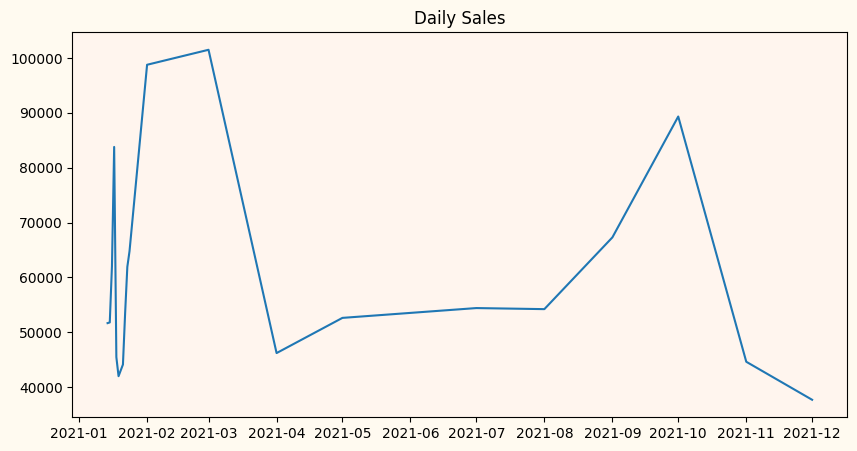

In [ ]:
#creating a daily sales plot
fig, ax = plt.subplots()
    
ax.plot(daily_sales['date'], daily_sales['total'])
ax.set_facecolor('seashell')
ax.set_title('Daily Sales')

fig.set_facecolor('floralwhite')
fig.set_figwidth(10)    
fig.set_figheight(5)  

In [ ]:
#set date as index
daily_sales.set_index('date', inplace = True)

In [ ]:
weekly_sales = daily_sales.resample('W').sum()

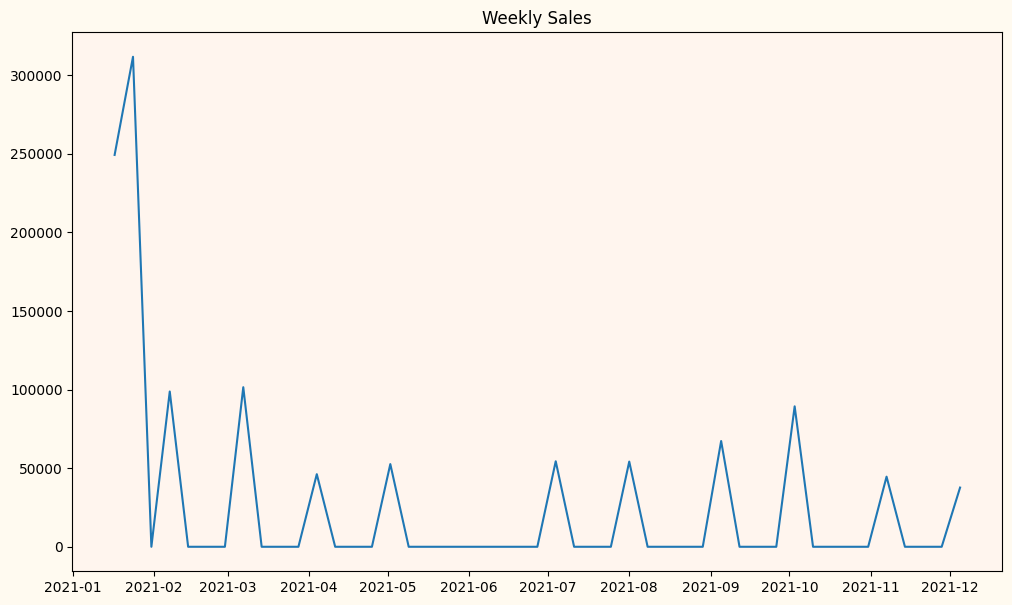

In [ ]:
#creating a weekly sales plot
fig, ax = plt.subplots()
    
ax.plot(weekly_sales.index, weekly_sales['total'])
ax.set_facecolor('seashell')
ax.set_title('Weekly Sales')

fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(7)  

In [ ]:
#creating a table of prices per unit
prices = bakery.groupby('article').agg({'unit_price':'max'}).sort_values(by = 'unit_price', ascending = True).reset_index()

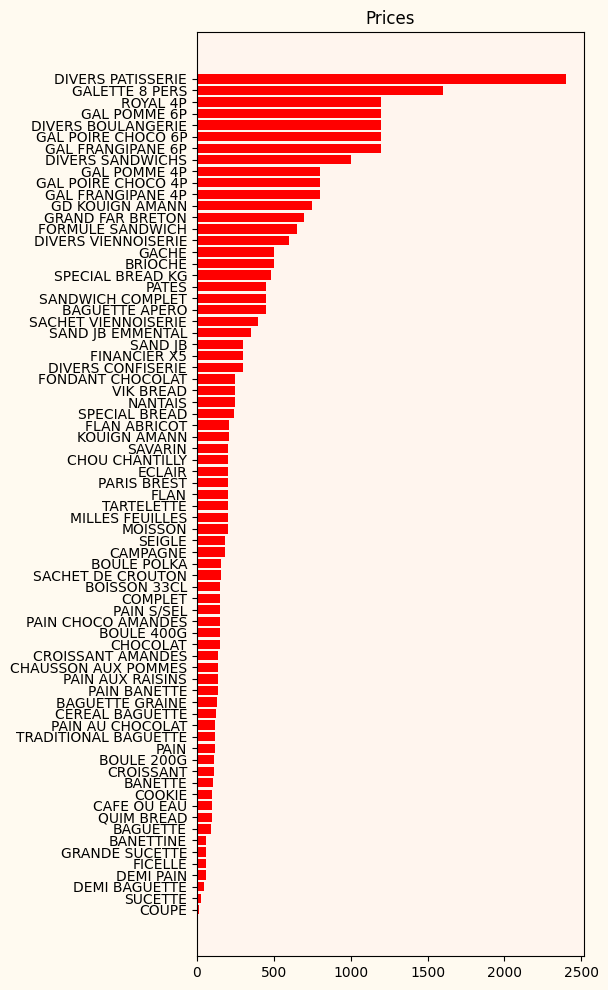

In [ ]:
#creating horizontal bar chart of prices
fig, ax = plt.subplots()
    
ax.barh(prices['article'], prices['unit_price'],color="red")
ax.set_facecolor('seashell')
ax.set_title('Prices')

fig.set_facecolor('floralwhite')
fig.set_figwidth(5)    
fig.set_figheight(12)   

In [ ]:
#creating a table of total quantity of sales per unit
sum_quantity = bakery.groupby('article').agg({'Quantity':'sum'}).sort_values(by = 'Quantity', ascending = True).reset_index()

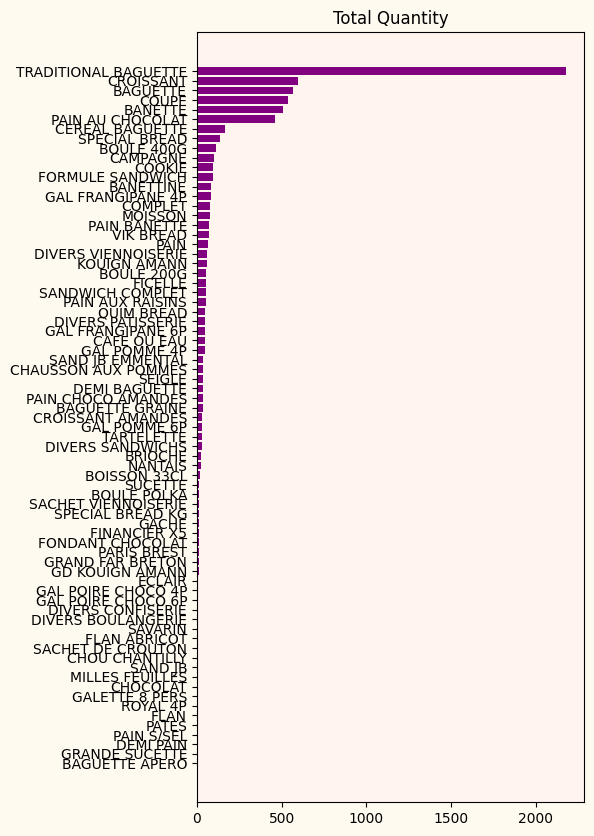

In [ ]:
#creating horizontal bar chart of quantity
fig, ax = plt.subplots()
    
ax.barh(sum_quantity['article'], sum_quantity['Quantity'],color="purple")
ax.set_facecolor('seashell')
ax.set_title('Total Quantity')

fig.set_facecolor('floralwhite')
fig.set_figwidth(5)    
fig.set_figheight(10)    

In [ ]:
#creating a table of total sales per hour
hours_sales = bakery.groupby('hour').agg({'total':'mean'}).reset_index()

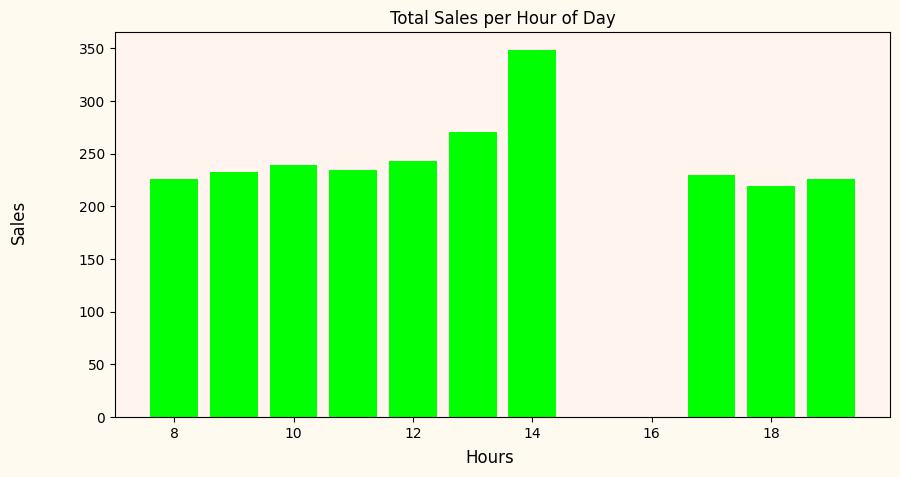

In [ ]:
#creating a table of total sales per hour
hours_sales = bakery.groupby('hour').agg({'total':'mean'}).reset_index()
#creating bar chart of total sales per hour of day
fig, ax = plt.subplots()
    
ax.bar(hours_sales['hour'], hours_sales['total'],color="lime")
ax.set_facecolor('seashell')
ax.set_title('Total Sales per Hour of Day')
fig.supxlabel("Hours")
fig.supylabel("Sales")
fig.set_facecolor('floralwhite')
fig.set_figwidth(10)    
fig.set_figheight(5)  

In [ ]:
#creating a table of total sales per day of week
day_of_week_sales = bakery.groupby('day_of_week').agg({'total':'sum'}).reset_index()

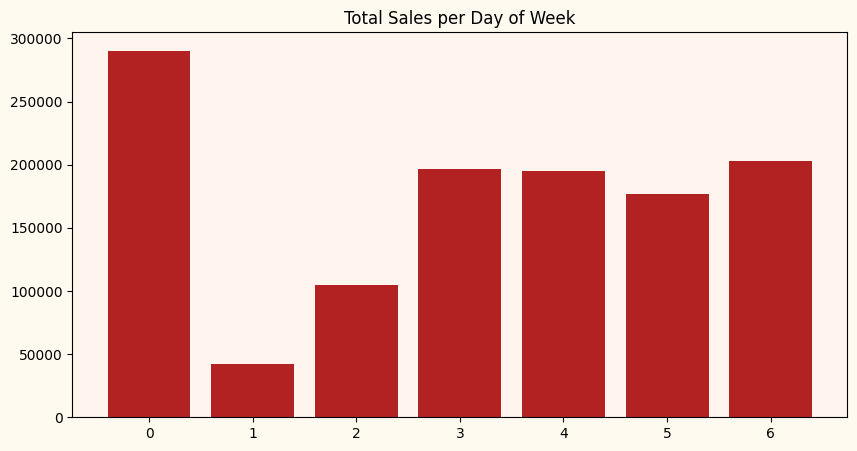

In [ ]:
#creating bar chart of total sales per day
fig, ax = plt.subplots()
    
ax.bar(day_of_week_sales['day_of_week'], day_of_week_sales['total'],color="firebrick")
ax.set_facecolor('seashell')
ax.set_title('Total Sales per Day of Week')
fig.set_facecolor('floralwhite')
fig.set_figwidth(10)    
fig.set_figheight(5)  

In [ ]:
#train - test split
train = weekly_sales[:int(0.7*len(weekly_sales))]
test = weekly_sales[int(0.7*len(weekly_sales)):]

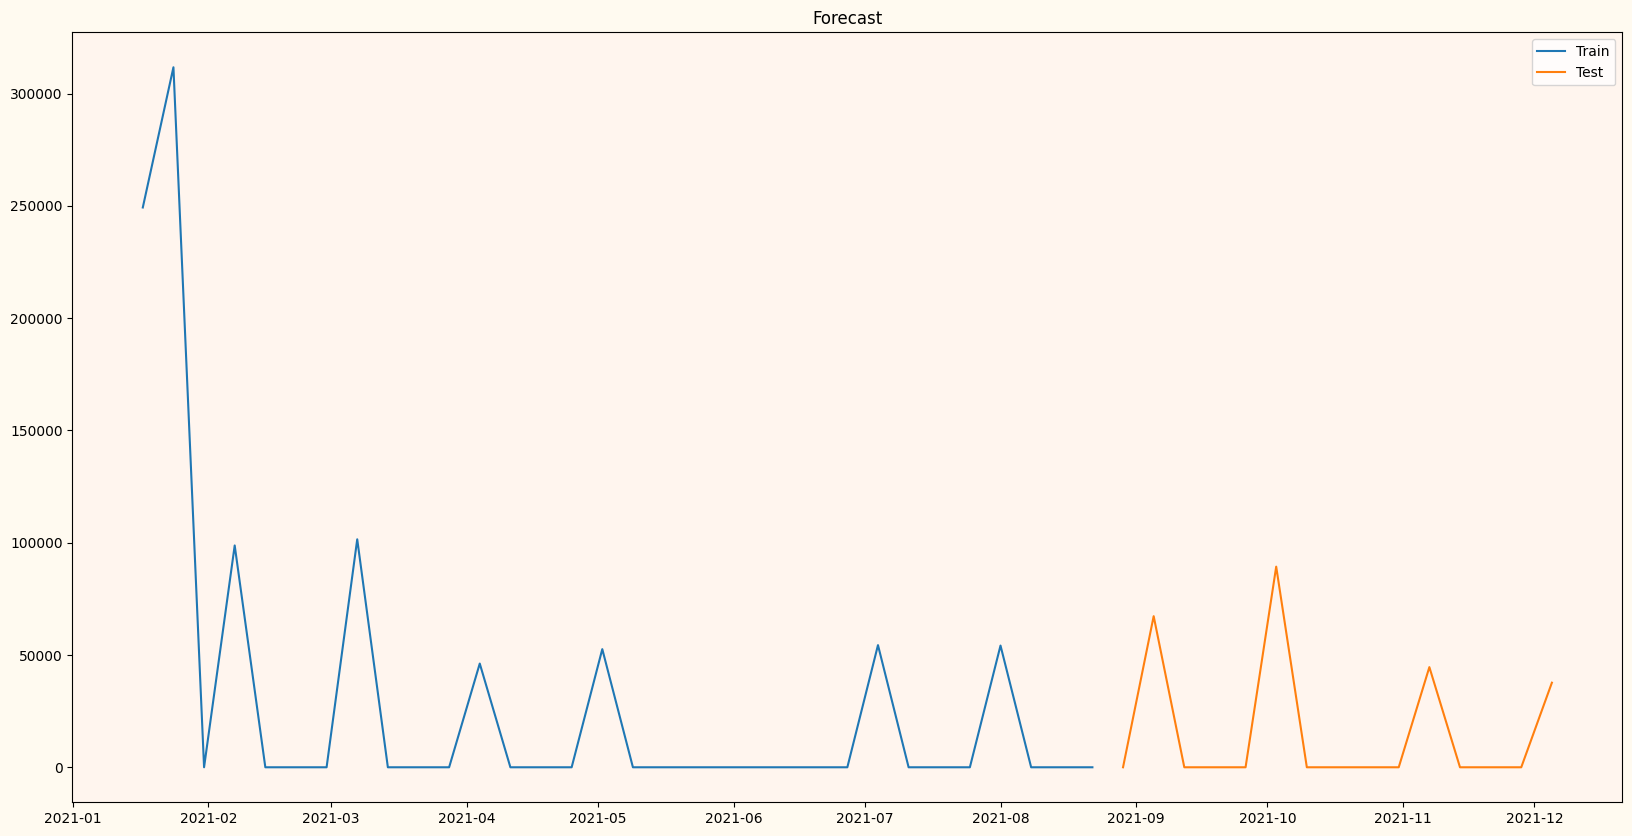

In [ ]:
#creating plot of train - teat split result
fig, ax = plt.subplots()
    
ax.plot(train, label = "Train")
ax.plot(test, label = 'Test')
ax.set_facecolor('seashell')
ax.set_title('Forecast')
ax.legend()

fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    
fig.set_figheight(10) 

In [ ]:
#training a model
model = SARIMAX(train, order=(3,0,2), seasonal_order=(0,1,0,52))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
#make a prediction
prediction = pd.DataFrame(model_fit.predict(start= len(train), end=(len(train) + len(test) - 1))).set_index(test.index)

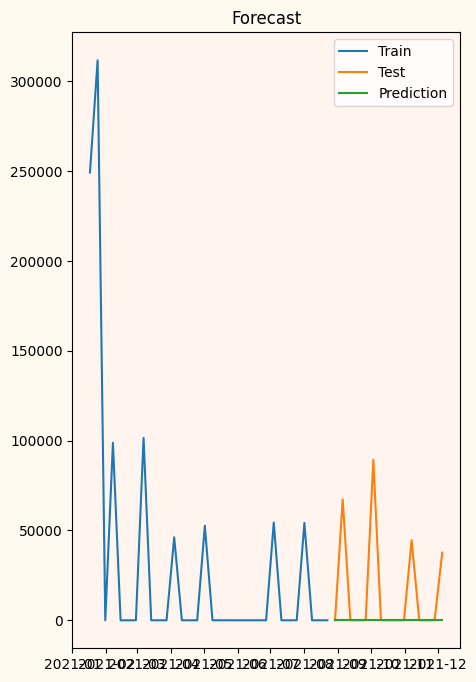

In [ ]:
#creating weekly sales forecasting plot 
fig, ax = plt.subplots()
    
ax.plot(train, label = "Train")
ax.plot(test, label = 'Test')
ax.plot(prediction, label = 'Prediction')
ax.set_facecolor('seashell')
ax.set_title('Forecast')
ax.legend()

fig.set_facecolor('floralwhite')
fig.set_figwidth(5)    
fig.set_figheight(8) 

In [ ]:
!pip install jupyter-dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from jupyter_dash import JupyterDash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

In [ ]:
JupyterDash.infer_jupyter_proxy_config()

In [ ]:
app=JupyterDash(__name__)
app.layout=html.Div([
    html.H1(" jupyter demo"),
    dcc.Graph(id='graph'),
    html.Label([
        'demo'
    ]),
])

@app.callback(
    Output('graph', 'figure'),
    [Input ("column-dropdown", "value")]
)
def update_figure(column):
  fig, ax = plt.subplots()
 
  return ax.barh(sum_quantity['article'], sum_quantity['Quantity'],color="purple")
app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
/usr/local/lib/python3.10/dist-packages/flask/app.py in full_dispatch_request(self=<Flask '__main__'>)
   1819         try:
   1820             request_started.send(self)
-> 1821             rv = self.preprocess_request()
        rv = undefined
        self.preprocess_request = <bound method Flask.preprocess_request of <Flask '__main__'>>
   1822             if rv is None:
   1823                 rv = self.dispatch_request()

/usr/local/lib/python3.10/dist-packages/flask/app.py in preprocess_request(self=<Flask '__main__'>)
   2311             if name in self.before_request_funcs:
   2312                 for before_func in self.before_request_funcs[name]:
-> 2313                     rv = self.ensure_sync(before_func)()
        rv = undefined
        self.ensure_sync = <bound method Flask.ensure_sync of <Flask '__main__'>>
        before

<IPython.core.display.Javascript object>